In [404]:
import pandas as pd
import re
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

Left is advanced, right is pergame

['Rk_x',
 'Player',
 'Pos_x',
 'Age_x',
 'Tm_x',
 'G_x',
 'MP_x',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WSp48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Season',
 'Teams_x',
 'Rk_y',
 'Pos_y',
 'Age_y',
 'Tm_y',
 'G_y',
 'GS',
 'MP_y',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PS/G',
 'Teams_y']

In [429]:
def read_advanced_season_stats(filepath):
    '''
    Function reads in the file at 'filepath' and returns a dataframe of the advanced stats
    Inputs: filepath--a path to the file (*advanced.csv)
    Returns: dataframe of per season advanced stats
    '''
    
    #Right now the Rk column is left in, I might want to combine it (zeropadded) with the season id to get
    #a unique player-row for the join, instead of doing a player-season-join
    
    df = pd.read_csv(filepath)
    #pull the seasonal years from the filepath
    years = re.findall(r"\d\d\d\d",filepath)
    #remove the "blank" columns that were added via the data mining recipe
    df.drop(['Blank', 'Blank.1'], axis=1, inplace=True)
    #Get the ending year for the season
    df['Season'] = int(years[-1])
    
    #Handle multiple teams, initialize to the 'Tm' field
    df['Teams'] = df['Tm']
    
    #Get rid of multiple rows per season per player
    df = reduce_traded_players_to_one_row(df)
    
    #rename minutes_played to avoid the collision with the _per_season minutes_played column
    df.rename({'MP':'MP_total'}, axis='columns', inplace=True)
    
    return df #.sort_values(['Season', 'Player'], ascending=[True, True])

In [430]:
def read_pergame_season_stats(filepath):
    '''
    Function reads in the file at 'filepath' and returns a dataframe of the per_game stats
    Inputs: filepath--a path to the file (*advanced.csv)
    Returns: dataframe of per season advanced stats
    '''
    df = pd.read_csv(filepath)
    #pull the seasonal years from the filepath
    years = re.findall(r"\d\d\d\d",filepath)
    df['Season'] = int(years[-1])
    
    #Handle multiple teams, initialize to the 'Tm' field (We're going to drop this, but it's needed to work with
    #reduced_traded_players_to_one_row)
    df['Teams'] = df['Tm']
    
    #Get rid of multiple rows per season per player
    df = reduce_traded_players_to_one_row(df)
   
    #Let's drop the columns that are duplicative of the advanced stats
    columns_to_drop = ['Pos', 'Age', 'Tm', 'G', 'Teams']
    df.drop(columns_to_drop, axis=1, inplace=True)
    
    df.rename({'MP':'MP_pergame'}, axis='columns', inplace=True)
    
    return df #.sort_values(['Season', 'Player'], ascending=[True, True])

In [407]:
df0607 = read_advanced_season_stats('../data/advanced/2006-2007_player_advanced.csv')

In [408]:
def reduce_traded_players_to_one_row(df):
    '''
    Reduces the traded players in the dataframe to one row.  Should be called on an individual seasonal dataframe
    because that's how the function was tested. Puts the invidual teams in a comma-delimited string
    ***Original DF is modified by this function***
    
    Input: seasonal dataframe (per_game or advanced)
    return: formatted dataframe (the same one passed in) with one row per payer
    '''
    #Each player that has been traded has 'TOT' in the Team column
    for player in df[df['Tm']=='TOT']['Player']:
        #get the unique teams in the list
        teams = list(df[df['Player']==player]['Tm'].unique())
        #remove the 'TOT' in the list
        teams.remove('TOT')
        #print('Should append: ', ','.join(teams))
        
        #Put the multiple teams in the 'Teams' field for the TOT column and player
        df.loc[(df['Tm']=='TOT') & (df['Player']==player), 'Teams'] = ','.join(teams)
        
    #Because the 'TOT' row appears first, we can drop duplicates
    df.drop_duplicates(subset=['Player'], inplace=True)
    
    return df
        
    
        
        
        
        

In [409]:
df0506pg = read_pergame_season_stats('../data/per_game/2005-2006_Player_per_game.csv')

In [410]:
df0506pg.head().T

,0,1,2,3,4
Rk,1,2,3,4,5
Player,Shareef Abdur-Rahim,Alex Acker,Malik Allen,Ray Allen*,Tony Allen
GS,30,0,20,78,9
MP_pergame,27.2,7,13,38.7,19.2
FG,4.6,0.8,2.2,8.7,2.5
FGA,8.8,3.2,4.6,19.2,5.4
FG%,0.525,0.25,0.49,0.454,0.471
3P,0.1,0.2,0,3.4,0.2
3PA,0.3,1,0,8.4,0.7
3P%,0.227,0.2,1,0.412,0.324


In [411]:
df0506pg[df0506pg.isnull().any(axis=1)].T

,1,6,12,26,27,38,42,46,51,53,...,492,498,502,512,517,521,523,534,542,562
Rk,2,7,11,19,20,25,29,33,36,38,...,402,406,408,418,423,427,429,438,442,458
Player,Alex Acker,Chris Andersen,Martynas Andriuskevicius,Stacey Augmon,Vin Baker,Earl Barron,Brandon Bass,Lonny Baxter,Jonathan Bender,Andris Biedrins,...,Kurt Thomas,Jake Tsakalidis,Ronny Turiaf,Jackson Vroman,Samaki Walker,Matt Walsh,Hakim Warrick,Robert Whaley,Aaron Williams,Derrick Zimmerman
GS,0,2,0,3,1,0,1,0,0,2,...,50,19,1,2,0,0,2,0,5,0
MP_pergame,7,17.8,1.5,10.7,10.6,5.6,9.2,9.8,10.5,14.7,...,26.6,14.4,7,9.9,3.1,1.5,10.6,9.2,16.5,16
FG,0.8,1.8,0,0.7,0.9,0.6,1,1.1,2,1.7,...,3.6,2,0.7,0.6,0,0.5,1.5,1,1.9,1
FGA,3.2,3.1,0.2,2,1.9,2,2.4,2.5,2.5,2.7,...,7.4,3.2,1.3,1.6,0.3,0.5,3.4,2.5,3.7,1.5
FG%,0.25,0.571,0,0.342,0.467,0.313,0.4,0.433,0.8,0.638,...,0.486,0.606,0.5,0.394,0,1,0.443,0.404,0.517,0.667
3P,0.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3PA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3P%,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some of the rows have NANs in them, probably from players who do not have many minutes across the season.  Or they just never shot a 3, or they never took a freethrow, or something to that effect.

In [412]:
df0607.info()
df0607[df0607.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 515
Data columns (total 29 columns):
Rk          458 non-null int64
Player      458 non-null object
Pos         458 non-null object
Age         458 non-null int64
Tm          458 non-null object
G           458 non-null int64
MP_total    458 non-null int64
PER         458 non-null float64
TS%         458 non-null float64
3PAr        458 non-null float64
FTr         458 non-null float64
ORB%        458 non-null float64
DRB%        458 non-null float64
TRB%        458 non-null float64
AST%        458 non-null float64
STL%        458 non-null float64
BLK%        458 non-null float64
TOV%        458 non-null float64
USG%        458 non-null float64
OWS         458 non-null float64
DWS         458 non-null float64
WS          458 non-null float64
WSp48       458 non-null float64
OBPM        458 non-null float64
DBPM        458 non-null float64
BPM         458 non-null float64
VORP        458 non-null float64
Season      458

,Rk,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams


In [413]:
df0607[df0607.isnull().any(axis=1)].T

""
Rk
Player
Pos
Age
Tm
G
MP_total
PER
TS%
3PAr


In [414]:
listdir('../data/advanced')

['1998-1999_player_advanced.csv',
 '2006-2007_player_advanced.csv',
 '2007-2008_player_advanced.csv',
 '2015-2016_player_advanced.csv',
 '2011-2012_player_advanced.csv',
 '2003-2003_player_advanced.csv',
 '2010-2011_player_advanced.csv',
 '1999-2000_player_advanced.csv',
 '2014-2015_player_advanced.csv',
 '2003-2004_player_advanced.csv',
 '2012-2013_player_advanced.csv',
 '2001-2002_player_advanced.csv',
 '2017-2018_player_advanced.csv',
 '1997-1998_player_advanced.csv',
 '2016-2017_player_advanced.csv',
 '1996-1997_player_advanced.csv',
 '2008-2009_player_advanced.csv',
 '2005-2006_player_advanced.csv',
 '2004-2005_player_advanced.csv',
 '2009-2010_player_advanced.csv',
 '2013-2014_player_advanced.csv',
 '2000-2001_player_advanced.csv']

In [415]:
def read_all_advanced(pathtodir):
    '''
    Read every advanced stat file into separate dataframes
    Concats the per_season dataframes together, and returns a big dataframe 
    
    Input: pathtodir -- the path to the directory that contains the per_season advanced stat csv files
    NOTE: the directory should only have advanced stat files within.  Do not mix file types.
    Returns: dataframe of all advanced stats, uncleaned
    '''
    #get the individual files
    files = listdir(pathtodir)
    #get a list of dataframes, one for every file
    dataframes = [read_advanced_season_stats(pathtodir + '/' + file) for file in files]
    #assemble the dataframes together, and return them.
    return pd.concat(dataframes).sort_values(['Season', 'Player'], ascending=[True, True])

In [416]:
def read_all_pergame(pathtodir):
    '''
    Read every per_game stat file (one for each season) into separate dataframes
    Concats the per_game dataframes together, and returns a dataframe that contain the per_game_stats for every
    season in the directory
    
    Input: pathtodir -- the path to the directory that contains the per_season per_game stat csv files
    NOTE: the directory should only have per_game stat files within.  Do not mix file types within the directory.
    Returns: dataframe of all per_game stats, uncleaned
    '''
    #get the individual files
    files = listdir(pathtodir)
    #print(files)
    #get a list of dataframes, one for every file
    #Had some bad data, so had to troubleshoot, seems to be working now after fixing some of the csvs
    #for file in files:
    #    print('Reading',file)
    #    df = read_pergame_season_stats(pathtodir + '/' + file)
    dataframes = [read_pergame_season_stats(pathtodir + '/' + file) for file in files]
    #assemble the dataframes together, and return them.
    return pd.concat(dataframes).sort_values(['Season', 'Player'], ascending=[True, True])

In [417]:
advanced = read_all_advanced('../data/advanced')

In [418]:
advanced.groupby("Season").mean()

,Rk,Age,G,MP_total,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1997,221.000000,27.573696,53.870748,1304.240363,12.613605,0.506411,0.197986,0.324261,6.592971,13.759637,...,15.541136,18.840816,1.446259,1.341270,2.789342,0.069263,-1.847392,-0.336281,-2.179592,0.656009
1998,220.000000,27.656036,54.671982,1310.068337,12.727107,0.498879,0.153094,0.340277,6.740547,13.402278,...,15.491096,19.272437,1.448975,1.344647,2.794077,0.069989,-1.643508,-0.482232,-2.124829,0.661048
1999,220.500000,27.572727,33.911364,796.931818,12.187955,0.482895,0.153698,0.359911,6.751136,13.258636,...,15.621461,19.530682,0.887045,0.812500,1.702955,0.058252,-1.964545,-0.868636,-2.834318,0.402955
2000,220.000000,27.674260,55.348519,1308.132118,12.533941,0.495767,0.155550,0.312235,6.233030,14.103417,...,14.672603,18.733257,1.439408,1.337813,2.780182,0.069651,-1.693166,-0.438952,-2.131663,0.662870
2001,221.000000,27.662132,54.358277,1305.034014,12.524717,0.490959,0.156604,0.310615,6.009524,14.016327,...,15.177727,18.505669,1.451474,1.329932,2.781633,0.071240,-1.707937,-0.506803,-2.215420,0.660771
2002,220.500000,27.209091,54.338636,1306.068182,12.799773,0.494153,0.162114,0.304913,6.067273,13.967727,...,14.066515,18.777045,1.446818,1.325000,2.772500,0.073541,-1.638864,-0.435227,-2.076136,0.657045
2003,214.500000,27.079439,55.932243,1344.439252,12.443692,0.484614,0.158450,0.299393,6.268692,13.898131,...,14.644028,18.728271,1.494159,1.366121,2.855374,0.066895,-1.808879,-0.418692,-2.226636,0.680374
2004,221.500000,27.004525,54.058824,1300.384615,12.347511,0.489459,0.162418,0.306820,6.104751,13.900452,...,15.121267,18.734615,1.452489,1.326471,2.781222,0.068437,-1.800000,-0.490498,-2.293439,0.656335
2005,232.500000,26.855603,53.782328,1282.327586,12.714440,0.502110,0.173907,0.328281,6.146552,13.936638,...,14.585345,18.592888,1.418534,1.303879,2.724784,0.075056,-1.597629,-0.356034,-1.953448,0.646983


Going to have to do something about these NANs

In [420]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 195 to 513
Data columns (total 29 columns):
Rk          10099 non-null int64
Player      10099 non-null object
Pos         10099 non-null object
Age         10099 non-null int64
Tm          10099 non-null object
G           10099 non-null int64
MP_total    10099 non-null int64
PER         10096 non-null float64
TS%         10068 non-null float64
3PAr        10066 non-null float64
FTr         10066 non-null float64
ORB%        10096 non-null float64
DRB%        10096 non-null float64
TRB%        10096 non-null float64
AST%        10096 non-null float64
STL%        10096 non-null float64
BLK%        10096 non-null float64
TOV%        10074 non-null float64
USG%        10096 non-null float64
OWS         10099 non-null float64
DWS         10099 non-null float64
WS          10099 non-null float64
WSp48       10096 non-null float64
OBPM        10099 non-null float64
DBPM        10099 non-null float64
BPM         10099 non-null 

In [421]:
pergame = read_all_pergame('../data/per_game')

In [422]:
pergame

,Rk,Player,GS,MP_pergame,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season
195,148,A.C. Green,73,30.0,2.8,5.8,0.483,0.0,0.2,0.050,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
333,252,Aaron McKie,11,19.6,1.8,4.4,0.411,0.5,1.2,0.398,...,0.5,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997
546,420,Aaron Williams,1,17.1,2.6,4.5,0.574,0.0,0.0,0.000,...,1.9,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997
142,109,Acie Earl,0,10.6,1.4,3.8,0.372,0.0,0.1,0.000,...,0.7,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997
261,195,Adam Keefe,0,14.8,1.3,2.6,0.513,0.0,0.0,0.000,...,1.2,2.3,3.5,0.5,0.5,0.2,0.7,1.6,3.8,1997
72,56,Adrian Caldwell,0,12.6,0.9,2.0,0.435,0.0,0.0,0.000,...,1.3,2.4,3.7,0.3,0.4,0.2,0.6,1.9,2.2,1997
220,166,Alan Henderson,0,16.7,2.6,5.4,0.475,0.0,0.0,NaN,...,1.6,2.3,3.9,0.8,0.7,0.2,1.0,2.4,6.6,1997
131,100,Aleksandar Djordjevic,0,7.6,1.0,2.0,0.500,0.6,0.9,0.714,...,0.1,0.5,0.6,0.6,0.0,0.0,0.6,0.4,3.1,1997
230,174,Allan Houston,81,33.1,5.4,12.7,0.423,1.8,4.7,0.385,...,0.5,2.4,3.0,2.2,0.5,0.2,2.1,2.9,14.8,1997
237,179,Allen Iverson*,74,40.1,8.2,19.8,0.416,2.0,6.0,0.341,...,1.5,2.6,4.1,7.5,2.1,0.3,4.4,3.1,23.5,1997


Number of  players in per game dataframe

In [362]:
len(pergame['Player'].unique())

2011

Number of players in advanced dataframe

In [363]:
len(advanced['Player'].unique())

2011

In [364]:
sorted(advanced['Pos'].unique())

['C',
 'C-PF',
 'C-SF',
 'PF',
 'PF-C',
 'PF-SF',
 'PG',
 'PG-SF',
 'PG-SG',
 'SF',
 'SF-PF',
 'SF-SG',
 'SG',
 'SG-PF',
 'SG-PG',
 'SG-SF']

In [366]:
#sorted(pergame['Pos'].unique())

At least the positions are consistent between the pergame and position tables.

Who is in the pergame table who is not in the advanced table?

The answer-No one, now that I added more data.

In [367]:
set(pergame['Player'].unique()) - set(advanced['Player'].unique())

set()

Ok, these look like "older" players (or at least players from 1997) who may not have much of the advanced stats

In [368]:
notinadvanced = set(pergame['Player'].unique()) - set(advanced['Player'].unique())

In [369]:
for player in notinadvanced:
    print(pergame[pergame['Player']== player])

In [370]:
for player in notinadvanced:
    print(pergame[pergame['Player']== player]['Season'])

In [371]:
advanced.groupby('Season').mean()

,Rk,Age,G,MP_total,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP
Season,,,,,,,,,,,,,,,,,,,,,
1997,221.000000,27.573696,53.870748,1304.240363,12.613605,0.506411,0.197986,0.324261,6.592971,13.759637,...,15.541136,18.840816,1.446259,1.341270,2.789342,0.069263,-1.847392,-0.336281,-2.179592,0.656009
1998,220.000000,27.656036,54.671982,1310.068337,12.727107,0.498879,0.153094,0.340277,6.740547,13.402278,...,15.491096,19.272437,1.448975,1.344647,2.794077,0.069989,-1.643508,-0.482232,-2.124829,0.661048
1999,220.500000,27.572727,33.911364,796.931818,12.187955,0.482895,0.153698,0.359911,6.751136,13.258636,...,15.621461,19.530682,0.887045,0.812500,1.702955,0.058252,-1.964545,-0.868636,-2.834318,0.402955
2000,220.000000,27.674260,55.348519,1308.132118,12.533941,0.495767,0.155550,0.312235,6.233030,14.103417,...,14.672603,18.733257,1.439408,1.337813,2.780182,0.069651,-1.693166,-0.438952,-2.131663,0.662870
2001,221.000000,27.662132,54.358277,1305.034014,12.524717,0.490959,0.156604,0.310615,6.009524,14.016327,...,15.177727,18.505669,1.451474,1.329932,2.781633,0.071240,-1.707937,-0.506803,-2.215420,0.660771
2002,220.500000,27.209091,54.338636,1306.068182,12.799773,0.494153,0.162114,0.304913,6.067273,13.967727,...,14.066515,18.777045,1.446818,1.325000,2.772500,0.073541,-1.638864,-0.435227,-2.076136,0.657045
2003,214.500000,27.079439,55.932243,1344.439252,12.443692,0.484614,0.158450,0.299393,6.268692,13.898131,...,14.644028,18.728271,1.494159,1.366121,2.855374,0.066895,-1.808879,-0.418692,-2.226636,0.680374
2004,221.500000,27.004525,54.058824,1300.384615,12.347511,0.489459,0.162418,0.306820,6.104751,13.900452,...,15.121267,18.734615,1.452489,1.326471,2.781222,0.068437,-1.800000,-0.490498,-2.293439,0.656335
2005,232.500000,26.855603,53.782328,1282.327586,12.714440,0.502110,0.173907,0.328281,6.146552,13.936638,...,14.585345,18.592888,1.418534,1.303879,2.724784,0.075056,-1.597629,-0.356034,-1.953448,0.646983


In [372]:
wsstd = advanced.groupby('Season').std()['WS']

In [373]:
wsmean = advanced.groupby('Season').mean()['WS']


In [374]:
seasons = list(advanced.groupby('Season').groups.keys())

In [375]:
advanced.groupby('Season').count()

,Rk,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Teams
Season,,,,,,,,,,,,,,,,,,,,,
1997,441,441,441,441,441,441,441,441,440,440,...,441,441,441,441,441,441,441,441,441,441
1998,439,439,439,439,439,439,439,439,437,437,...,439,439,439,439,439,439,439,439,439,439
1999,440,440,440,440,440,440,440,440,438,437,...,440,440,440,440,440,440,440,440,440,440
2000,439,439,439,439,439,439,439,439,438,438,...,439,439,439,439,439,439,439,439,439,439
2001,441,441,441,441,441,441,441,441,439,439,...,441,441,441,441,441,441,441,441,441,441
2002,440,440,440,440,440,440,440,440,439,439,...,440,440,440,440,440,440,440,440,440,440
2003,428,428,428,428,428,428,428,428,427,427,...,428,428,428,428,428,428,428,428,428,428
2004,442,442,442,442,442,442,442,442,440,440,...,442,442,442,442,442,442,442,442,442,442
2005,464,464,464,464,464,464,464,464,464,463,...,464,464,464,464,464,464,464,464,464,464


Text(0.5, 1.0, 'Win-Shares with Standard Deviation Per Season')

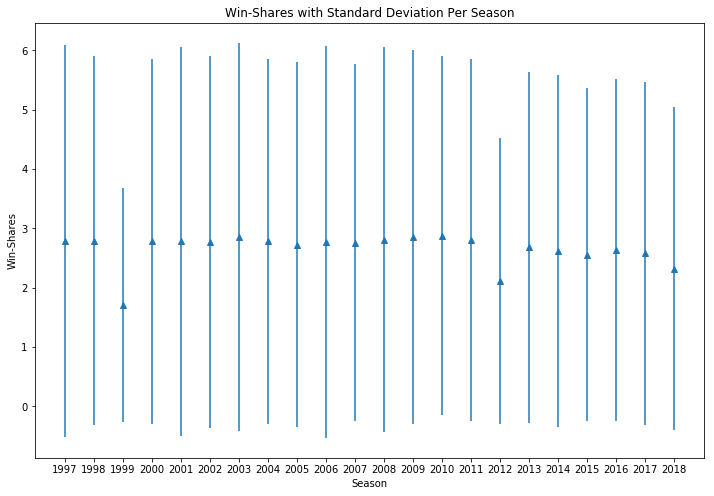

In [376]:
plt.figure(figsize=(12,8))
plt.errorbar(seasons, wsmean, wsstd, linestyle='None', marker='^')
plt.xlabel('Season')
plt.ylabel('Win-Shares')
plt.xticks(seasons, seasons)
plt.title('Win-Shares with Standard Deviation Per Season')


Text(0.5, 0, 'Win Shares')

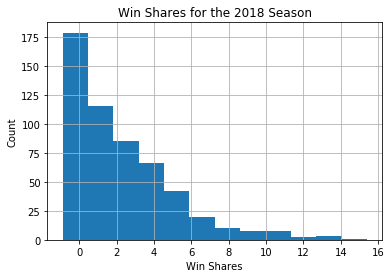

In [377]:
advanced[advanced['Season'] == 2018]['WS'].hist(bins=12)
plt.title('Win Shares for the 2018 Season')
plt.ylabel('Count')
plt.xlabel('Win Shares')

In [378]:
def plot_histogram(df, colname, season, bins=10, xlabel = None, alpha = .25):
    '''
    Plots a histogram of the dataframe, based on the column name and the season
    df: input dataframe (pandas dataframe)
    colname: e.g., 'WS' for Win shares (string)
    season: e.g, 2018 (integer)
    
    Returns: Nothing
    '''
    df[df['Season'] == season][colname].hist(bins=bins)
    plt.title('Win Shares for the ' + str(season) + ' Season')
    plt.ylabel('Count')
    plt.xlabel(xlabel)

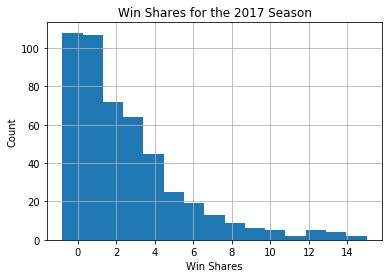

In [379]:
plot_histogram(advanced, 'WS', 2017, bins=15, xlabel = "Win Shares")

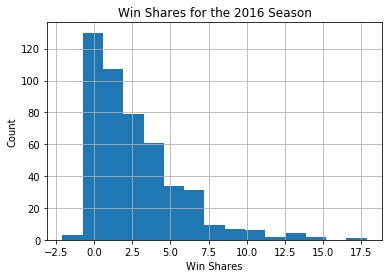

In [380]:
plot_histogram(advanced, 'WS', 2016, bins=15, xlabel = "Win Shares")

Man, who sucked so much in 2016?

In [381]:
advanced[advanced['Season']==2016]['WS'].min()

-2.1

In [382]:
advanced[(advanced['Season']==2016) & (advanced['WS']== -2.1)]

,Rk,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
389,318,Emmanuel Mudiay,PG,19,DEN,68,2068,9.9,0.437,0.256,...,-3.3,1.2,-2.1,-0.049,-3.1,-1.2,-4.3,-1.2,2016,DEN


Oh no, maybe Emmanuel should have gone to SMU instead of China

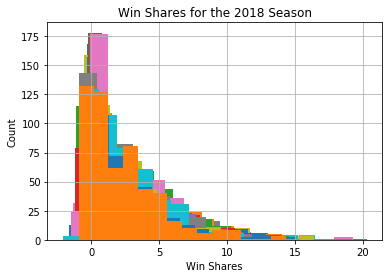

In [383]:
for season in seasons:
    plot_histogram(advanced, 'WS', season, bins=15, xlabel = "Win Shares", alpha = .02)

Let's do some **NAN** filling

In [384]:
advancednans = advanced[advanced.isnull().any(axis=1)]

So it appears that the most **anyone** played in the entire season with a NAN in the advanced stats is 33 minutes, and the average is 4.78 minutes

In [385]:
advancednans.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,33.0,254.454545,130.452360,34.000,138.0000,260.000,360.000,447.000
Age,33.0,26.060606,4.513448,20.000,23.0000,25.000,28.000,39.000
G,33.0,1.787879,0.992395,1.000,1.0000,2.000,2.000,5.000
MP_total,33.0,5.121212,5.354657,0.000,2.0000,4.000,6.000,24.000
PER,30.0,1.556667,11.763787,-22.100,-3.4250,0.000,4.600,37.700
TS%,2.0,0.568000,0.000000,0.568,0.5680,0.568,0.568,0.568
3PAr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FTr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORB%,30.0,4.616667,10.648266,0.000,0.0000,0.000,0.000,38.700
DRB%,30.0,14.383333,24.360569,0.000,0.0000,0.000,21.050,100.000


In [386]:
advanced.isna().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
MP_total     0
PER          3
TS%         31
3PAr        33
FTr         33
ORB%         3
DRB%         3
TRB%         3
AST%         3
STL%         3
BLK%         3
TOV%        25
USG%         3
OWS          0
DWS          0
WS           0
WSp48        3
OBPM         0
DBPM         0
BPM          0
VORP         0
Season       0
Teams        0
dtype: int64

These three players (Alex Scales, JamesOn Curry, and Damion James) have a lot of NANs, given that they each played less than a minute, I will just fill with zeroes.

In [387]:
advanced[advanced['PER'].isnull()].T

,442,119,253
Rk,365,99,211
Player,Alex Scales,JamesOn Curry,Damion James
Pos,SG,PG,SF
Age,27,24,25
Tm,SAS,LAC,BRK
G,1,1,2
MP_total,0,0,0
PER,NaN,NaN,NaN
TS%,NaN,NaN,NaN
3PAr,NaN,NaN,NaN


In [388]:
advanced[advanced['TS%'].isnull()].T

,44,56,250,43,502,221,382,251,417,376,...,89,505,121,51,590,123,248,428,404,378
Rk,34,57,251,38,436,193,309,210,366,332,...,73,399,91,44,447,112,204,348,329,307
Player,Bruce Bowen,Adrian Caldwell,Michael McDonald,Etdrick Bohannon,Trevor Winter,Randell Jackson,Andy Panko,Lari Ketner,Dickey Simpkins,Guy Rucker,...,Matt Carroll,Chris Smith,Josh Childress,Jerrelle Benimon,Ronny Turiaf,Sam Dekker,Danuel House,Ben Moore,Trey McKinney-Jones,Tyler Lydon
Pos,SF,PF,C,SF,C,PF,SF,PF,PF,PF,...,SG,PG,SF,PF,C,PF,SG,PF,SG,PF
Age,25,31,28,25,25,24,23,23,29,25,...,32,26,30,23,32,21,23,22,27,21
Tm,MIA,DAL,CHH,WAS,MIN,DAL,ATL,IND,ATL,GSW,...,CHA,NYK,NOP,UTA,MIN,HOU,WAS,IND,IND,DEN
G,1,1,1,2,1,1,1,3,1,3,...,1,2,4,2,2,3,1,2,1,1
MP_total,1,3,4,4,5,1,1,7,3,4,...,6,2,24,3,19,6,1,9,1,2
PER,37.7,0,-22.1,0,-4.3,0,0,-10.6,11.6,7.8,...,2.9,0,3.9,4.7,4.3,10.8,12.2,-2.3,0,0
TS%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3PAr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
advanced[advanced['TOV%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
44,34,Bruce Bowen,SF,25,MIA,1,1,37.7,NaN,NaN,...,0.0,0.0,0.0,0.321,-10.6,46.8,36.2,0.0,1997,MIA
56,57,Adrian Caldwell,PF,31,DAL,1,3,0.0,NaN,NaN,...,0.0,0.0,0.0,-0.022,-7.3,-0.6,-7.9,0.0,1998,DAL
43,38,Etdrick Bohannon,SF,25,WAS,2,4,0.0,NaN,NaN,...,0.0,0.0,0.0,-0.017,-6.1,0.0,-6.1,0.0,1999,WAS
502,436,Trevor Winter,C,25,MIN,1,5,-4.3,NaN,NaN,...,0.0,0.0,0.0,0.202,-7.8,-4.0,-11.8,0.0,1999,MIN
221,193,Randell Jackson,PF,24,DAL,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,-0.025,-5.8,-0.4,-6.1,0.0,2000,DAL
382,309,Andy Panko,SF,23,ATL,1,1,0.0,NaN,NaN,...,0.0,0.0,0.0,-0.017,-6.3,0.0,-6.4,0.0,2001,ATL
417,366,Dickey Simpkins,PF,29,ATL,1,3,11.6,NaN,NaN,...,0.0,0.0,0.0,0.116,-8.0,-12.7,-20.6,0.0,2002,ATL
376,332,Guy Rucker,PF,25,GSW,3,4,7.8,NaN,NaN,...,0.0,0.0,0.0,0.117,-4.1,-1.1,-5.2,0.0,2003,GSW
442,365,Alex Scales,SG,27,SAS,1,0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,-6.0,1.6,-4.4,0.0,2006,SAS
437,360,Bryon Russell,SF,35,DEN,1,3,16.4,NaN,NaN,...,0.0,0.0,0.0,0.194,-4.8,0.9,-3.9,0.0,2006,DEN


In [390]:
pergamenan = pergame[pergame.isnull().any(axis=1)]

In [391]:
pergamenan.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,1753.0,235.468910,133.148423,1.0,116.000,247.0000,348.000,539.0
GS,1753.0,11.588705,20.918826,0.0,0.000,1.0000,13.000,83.0
MP_pergame,1753.0,12.272048,8.292028,0.0,5.900,10.0000,16.700,42.0
FG,1753.0,1.471934,1.418755,0.0,0.500,1.0000,2.000,11.2
FGA,1753.0,3.116144,2.653676,0.0,1.300,2.3000,4.000,19.1
FG%,1720.0,0.442681,0.168961,0.0,0.375,0.4675,0.528,1.0
3P,1753.0,0.027210,0.152999,0.0,0.000,0.0000,0.000,2.4
3PA,1753.0,0.090131,0.383834,0.0,0.000,0.0000,0.000,5.0
3P%,162.0,0.253506,0.267161,0.0,0.000,0.2220,0.400,1.0
2P,1753.0,1.444552,1.427872,0.0,0.500,1.0000,2.000,11.2


In [392]:
pergamenan.head().T

,220,292,124,283,340
Rk,166,217,93,210,255
Player,Alan Henderson,Alton Lister,Andrew DeClercq,Andrew Lang,Anthony Miller
GS,0,2,1,52,0
MP_pergame,16.7,9.7,15,23,14
FG,2.6,0.6,2,2.2,0
FGA,5.4,1.5,3.8,4.8,5
FG%,0.475,0.416,0.52,0.464,0
3P,0,0,0,0,0
3PA,0,0,0,0,0
3P%,NaN,NaN,NaN,NaN,NaN


So players who haven't taken a 3, field goal, or free throw are likely the ones generating NANs.  Let's confirm.

In [393]:
pergamenan.isna().sum()

Rk               0
Player           0
GS               0
MP_pergame       0
FG               0
FGA              0
FG%             33
3P               0
3PA              0
3P%           1591
2P               0
2PA              0
2P%             55
eFG%            33
FT               0
FTA              0
FT%            345
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PS/G             0
Season           0
dtype: int64

In [394]:
len(pergamenan[pergamenan['3PA']==0])
    

1591

In [395]:
len(pergamenan[pergamenan['FGA']==0])

33

In [396]:
len(pergamenan[pergamenan['FTA']==0])

345

In [397]:
len(pergamenan[pergamenan['2PA']==0])

55

Looks like it, those numbers match-up.  And they appear to be many low-minutes players.

In [399]:
pergamenan[pergamenan['2PA']==0][['Player', 'MP_pergame']]

,Player,MP_pergame
44,Bruce Bowen,1.0
76,Adrian Caldwell,3.0
292,Michael McDonald,4.0
484,Brandon Williams,1.3
43,Etdrick Bohannon,2.0
502,Trevor Winter,5.0
477,Tyson Wheeler,3.0
316,Jason Miskiri,3.0
221,Randell Jackson,1.0
382,Andy Panko,1.0


In [501]:
def clean_and_join_seasonal_dataframe(df_advanced, df_pergame):
    '''
    Fills the seasonal dataframes with 0 for their nans and returns a joined, cleaned dataframe
    Inputs: df_pergame dataframe, read in by read_pergame_season_stats
            df_advanced dataframe, read in by read_advanced_season_stats
    
    Returns: combined dataframe of pergame and advanced stats
    '''
    
    #Merge on dataframe, by player and season
    joined_df = pd.merge(advanced, pergame, how='left', left_on=['Player','Season'], right_on = ['Player','Season'])
    
    #Based on EDA, most of the stats with NANs come from low-minutes players who haven't done much in-game
    #also, using the fill in-place because I've had trouble with fillna not working in the past.
    joined_df.fillna(0, inplace=True)
    
    #dropped the ranks if they are still in (might modify earlier)
    if 'Rk_x' in joined_df:
        joined_df.drop('Rk_x',axis=1, inplace=True)
    if 'Rk_y' in joined_df:
        joined_df.drop('Rk_y',axis=1, inplace=True)
        
    joined_df = joined_df.reset_index(drop=True)
    
    joined_df['Player'] = joined_df['Player'].str.replace('*', '', regex=False)
    
    return joined_df.sort_values(['Player', 'Season'], ascending=[True, True])

In [401]:
advanced.fillna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 195 to 513
Data columns (total 29 columns):
Rk          10099 non-null int64
Player      10099 non-null object
Pos         10099 non-null object
Age         10099 non-null int64
Tm          10099 non-null object
G           10099 non-null int64
MP_total    10099 non-null int64
PER         10096 non-null float64
TS%         10068 non-null float64
3PAr        10066 non-null float64
FTr         10066 non-null float64
ORB%        10096 non-null float64
DRB%        10096 non-null float64
TRB%        10096 non-null float64
AST%        10096 non-null float64
STL%        10096 non-null float64
BLK%        10096 non-null float64
TOV%        10074 non-null float64
USG%        10096 non-null float64
OWS         10099 non-null float64
DWS         10099 non-null float64
WS          10099 non-null float64
WSp48       10096 non-null float64
OBPM        10099 non-null float64
DBPM        10099 non-null float64
BPM         10099 non-null 

In [181]:
advanced[advanced['Player']=='Acie Earl']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season


In [240]:
advanced[advanced['Player']=='Jae Crowder']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season
115,93,Jae Crowder,SF,22,DAL,78,1353,10.2,0.491,0.523,...,15.1,0.2,1.3,1.5,0.055,-0.9,0.4,-0.5,0.5,2013
141,107,Jae Crowder,SF,23,DAL,78,1254,11.9,0.551,0.510,...,13.2,1.2,1.1,2.3,0.089,0.0,0.6,0.6,0.8,2014
129,108,Jae Crowder,SF,24,TOT,82,1647,13.9,0.517,0.382,...,17.5,1.9,2.0,3.9,0.113,-0.1,0.6,0.6,1.1,2015
130,108,Jae Crowder,SF,24,DAL,25,265,12.7,0.550,0.500,...,15.3,0.3,0.3,0.5,0.098,0.6,0.5,1.1,0.2,2015
131,108,Jae Crowder,SF,24,BOS,57,1382,14.1,0.512,0.362,...,17.9,1.6,1.8,3.3,0.116,-0.2,0.7,0.5,0.9,2015
110,101,Jae Crowder,SF,25,BOS,73,2308,15.8,0.565,0.446,...,18.5,3.8,3.5,7.3,0.152,1.5,1.3,2.8,2.8,2016
117,95,Jae Crowder,SF,26,BOS,72,2335,14.9,0.613,0.547,...,17.0,4.1,2.5,6.7,0.137,1.4,0.2,1.6,2.1,2017
140,118,Jae Crowder,SF,27,TOT,80,2090,10.4,0.525,0.508,...,17.3,1.0,1.6,2.6,0.060,-0.8,-0.9,-1.7,0.1,2018
141,118,Jae Crowder,SF,27,CLE,53,1346,10.2,0.545,0.503,...,15.1,1.1,0.6,1.7,0.059,-0.6,-1.2,-1.8,0.1,2018
142,118,Jae Crowder,SF,27,UTA,27,744,10.8,0.499,0.515,...,21.3,-0.1,1.0,0.9,0.060,-1.3,-0.4,-1.6,0.1,2018


In [246]:
pergame[pergame['Tm']=='TOT']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season
195,148,A.C. Green,PF,33,TOT,83,73,30.0,2.8,5.8,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
333,252,Aaron McKie,SG,24,TOT,83,11,19.6,1.8,4.4,...,0.5,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997
546,420,Aaron Williams,PF-C,25,TOT,33,1,17.1,2.6,4.5,...,1.9,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997
142,109,Acie Earl,C,26,TOT,47,0,10.6,1.4,3.8,...,0.7,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997
72,56,Adrian Caldwell,PF,30,TOT,45,0,12.6,0.9,2.0,...,1.3,2.4,3.7,0.3,0.4,0.2,0.6,1.9,2.2,1997
182,139,Anthony Goldwire,PG,25,TOT,60,30,19.8,2.2,5.5,...,0.2,1.2,1.4,3.7,0.6,0.0,1.3,1.7,6.5,1997
509,389,Brooks Thompson,PG,26,TOT,67,6,15.7,2.4,6.1,...,0.3,1.2,1.4,2.7,0.8,0.0,1.3,1.9,6.6,1997
85,64,Cedric Ceballos,SF,27,TOT,50,40,28.5,5.6,12.3,...,2.0,4.6,6.6,1.3,0.7,0.5,1.7,2.3,14.6,1997
175,134,Chris Gatling,PF,29,TOT,47,1,27.3,7.0,13.3,...,2.9,5.0,7.9,0.6,0.8,0.7,2.6,2.9,19.0,1997
53,41,Chucky Brown,SF,28,TOT,70,1,10.8,1.1,2.2,...,0.6,1.5,2.1,0.4,0.1,0.3,0.3,1.4,2.9,1997


In [245]:
pd.merge(advanced, pergame, how='left', left_on=['Player'], right_on = ['Player']).head(5).T

,0,1,2,3,4
Rk_x,148,148,148,148,148
Player,A.C. Green,A.C. Green,A.C. Green,A.C. Green,A.C. Green
Pos_x,PF,PF,PF,PF,PF
Age_x,33,33,33,33,33
Tm_x,TOT,TOT,TOT,TOT,TOT
G_x,83,83,83,83,83
MP_x,2492,2492,2492,2492,2492
PER,12.4,12.4,12.4,12.4,12.4
TS%,0.523,0.523,0.523,0.523,0.523
3PAr,0.041,0.041,0.041,0.041,0.041


In [286]:
df0607adv = read_advanced_season_stats('../data/advanced/2006-2007_player_advanced.csv')

In [287]:
df0607pg = read_pergame_season_stats('../data/per_game/2006-2007_Player_per_game.csv')

In [288]:
for player in df0607adv[df0607adv['Tm']=='TOT']['Player']:
    #print("Player", player, df0607adv[df0607adv['Player']==player]['Tm'].unique())
    teams = list(df0607adv[df0607adv['Player']==player]['Tm'].unique())
    teams.remove('TOT')
    print(teams)

['UTA', 'PHI']
['MIL', 'DEN']
['DEN', 'MIL']
['MEM', 'LAC']
['GSW', 'IND']
['POR', 'TOR']
['GSW', 'IND']
['CHA', 'SAS']
['IND', 'GSW']
['SAC', 'LAC']
['DEN', 'MIL']
['PHI', 'DEN']
['LAC', 'TOR']
['IND', 'GSW']
['IND', 'GSW']
['DAL', 'ATL']
['MEM', 'MIA']
['TOR', 'POR']
['GSW', 'IND']
['DEN', 'PHI']
['GSW', 'IND']
['HOU', 'MEM']
['IND', 'GSW']
['ATL', 'POR']
['CHA', 'NJN']
['DEN', 'PHI']
['MEM', 'HOU']
['PHI', 'DET']
['SAS', 'CHA']


In [258]:
deduped = df0607adv.drop_duplicates(subset=['Player'])

In [289]:
deduped[deduped['Player']=='Chris Webber']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
482,429,Chris Webber,PF,33,TOT,61,1821,16.0,0.482,0.017,...,0.7,2.7,3.4,0.09,-0.8,2.2,1.4,1.5,2007,


In [290]:
df0607adv[df0607adv['Player']=='Chris Webber']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
482,429,Chris Webber,PF,33,TOT,61,1821,16.0,0.482,0.017,...,0.7,2.7,3.4,0.090,-0.8,2.2,1.4,1.5,2007,
483,429,Chris Webber,PF,33,PHI,18,544,13.8,0.409,0.022,...,-0.6,0.8,0.2,0.014,-2.9,2.2,-0.7,0.2,2007,
484,429,Chris Webber,PF,33,DET,43,1277,16.9,0.520,0.015,...,1.3,1.9,3.3,0.123,0.1,2.1,2.2,1.4,2007,


In [292]:
df0607adv = reduce_traded_players_to_one_row(df0607adv)

Should append:  UTA,PHI
Should append:  MIL,DEN
Should append:  DEN,MIL
Should append:  MEM,LAC
Should append:  GSW,IND
Should append:  POR,TOR
Should append:  GSW,IND
Should append:  CHA,SAS
Should append:  IND,GSW
Should append:  SAC,LAC
Should append:  DEN,MIL
Should append:  PHI,DEN
Should append:  LAC,TOR
Should append:  IND,GSW
Should append:  IND,GSW
Should append:  DAL,ATL
Should append:  MEM,MIA
Should append:  TOR,POR
Should append:  GSW,IND
Should append:  DEN,PHI
Should append:  GSW,IND
Should append:  HOU,MEM
Should append:  IND,GSW
Should append:  ATL,POR
Should append:  CHA,NJN
Should append:  DEN,PHI
Should append:  MEM,HOU
Should append:  PHI,DET
Should append:  SAS,CHA


In [293]:
df0607adv[df0607adv['Player'] == 'Chris Webber']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
482,429,Chris Webber,PF,33,TOT,61,1821,16.0,0.482,0.017,...,0.7,2.7,3.4,0.09,-0.8,2.2,1.4,1.5,2007,"PHI,DET"


In [311]:
advanced = read_all_advanced('../data/advanced')
pergame = read_all_pergame('../data/per_game')

In [312]:
advanced

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,...,2.4,2.4,4.8,0.093,-1.8,0.7,-1.1,0.6,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"
546,420,Aaron Williams,PF-C,25,TOT,33,563,16.4,0.599,0.007,...,0.7,0.4,1.1,0.098,-1.7,-0.4,-2.0,0.0,1997,"DEN,VAN"
142,109,Acie Earl,C,26,TOT,47,500,10.7,0.433,0.028,...,-0.5,0.5,0.0,-0.004,-6.2,-0.4,-6.6,-0.6,1997,"TOR,MIL"
261,195,Adam Keefe,C,26,UTA,62,915,11.7,0.572,0.006,...,1.0,1.3,2.3,0.118,-1.1,0.9,-0.2,0.4,1997,UTA
72,56,Adrian Caldwell,PF,30,TOT,45,569,7.5,0.443,0.022,...,-0.2,0.4,0.2,0.016,-5.2,-0.9,-6.1,-0.6,1997,"NJN,PHI"
220,166,Alan Henderson,PF,24,ATL,30,501,15.0,0.510,0.000,...,0.5,0.9,1.3,0.126,-2.0,0.3,-1.7,0.0,1997,ATL
131,100,Aleksandar Djordjevic,SG,29,POR,8,61,12.5,0.687,0.438,...,0.1,0.0,0.1,0.114,-0.4,-3.4,-3.8,0.0,1997,POR
230,174,Allan Houston,SG,25,NYK,81,2681,11.3,0.531,0.372,...,1.5,3.2,4.7,0.084,-0.5,-1.0,-1.5,0.4,1997,NYK
237,179,Allen Iverson*,PG,21,PHI,76,3045,18.0,0.513,0.303,...,3.1,1.0,4.1,0.065,3.4,-2.0,1.5,2.7,1997,PHI


In [316]:
pergame['Age'] - advanced['Age']

0      0
0     -1
0      3
0      2
0     -4
0      0
0     -1
0      0
0     -1
0     -2
0     -3
0     -4
0      1
0      3
0      3
0      2
0      5
0      4
0      3
0      2
0      4
0      3
0      1
0      0
0      4
0      3
0     -3
0      1
0      0
0      1
      ..
643    0
643    0
643    0
644    0
644   -8
644    8
644    0
645    0
645    8
645   -8
645    0
646    0
646   -1
646    1
646    0
647    0
648    0
649    0
650    0
651    0
652    0
653    0
654    0
655    0
656    0
657    0
658    0
661    0
662    0
663    0
Name: Age, Length: 174022, dtype: int64

In [314]:
len(advanced)

10099

In [315]:
len(pergame)

10099

In [322]:
pergame['Player'].unique().shape, advanced['Player'].unique().shape

((2011,), (2011,))

In [319]:
advanced.head(2)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,...,2.4,2.4,4.8,0.093,-1.8,0.7,-1.1,0.6,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"


In [326]:
merged = pd.merge(advanced, pergame, how='left', left_on=['Player','Season'], right_on = ['Player','Season'])

In [333]:
merged.head().T

,0,1,2,3,4
Rk_x,148,252,420,109,195
Player,A.C. Green,Aaron McKie,Aaron Williams,Acie Earl,Adam Keefe
Pos_x,PF,SG,PF-C,C,C
Age_x,33,24,25,26,26
Tm_x,TOT,TOT,TOT,TOT,UTA
G_x,83,83,33,47,62
MP_x,2492,1625,563,500,915
PER,12.4,12.1,16.4,10.7,11.7
TS%,0.523,0.524,0.599,0.433,0.572
3PAr,0.041,0.282,0.007,0.028,0.006


In [332]:
advanced[advanced['Player']=='Aaron McKie']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"
255,256,Aaron McKie,SG-SF,25,TOT,81,1813,8.6,0.410,0.165,...,-0.7,2.0,1.4,0.036,-2.8,1.5,-1.3,0.3,1998,"PHI,DET"
296,251,Aaron McKie,SG,26,PHI,50,959,11.4,0.454,0.131,...,-0.1,1.7,1.6,0.082,-2.1,1.8,-0.3,0.4,1999,PHI
304,264,Aaron McKie,SG,27,PHI,82,1952,13.2,0.497,0.204,...,1.3,3.0,4.3,0.105,-0.5,1.6,1.1,1.5,2000,PHI
309,258,Aaron McKie,SG,28,PHI,76,2394,15.1,0.549,0.238,...,2.3,3.5,5.9,0.118,0.9,1.0,1.9,2.4,2001,PHI
298,265,Aaron McKie,SG,29,PHI,48,1471,15.8,0.540,0.261,...,1.8,2.1,3.9,0.128,0.9,0.5,1.4,1.3,2002,PHI
282,250,Aaron McKie,SF,30,PHI,80,2374,13.7,0.497,0.168,...,2.1,3.0,5.1,0.104,0.0,1.4,1.4,2.0,2003,PHI
336,264,Aaron McKie,SF,31,PHI,75,2112,13.9,0.550,0.298,...,2.5,2.3,4.8,0.108,0.6,0.7,1.3,1.7,2004,PHI
337,276,Aaron McKie,SG,32,PHI,68,1118,8.4,0.510,0.437,...,0.5,1.5,2.0,0.085,-3.1,2.2,-0.9,0.3,2005,PHI
324,269,Aaron McKie,PG,33,LAL,14,121,6.1,0.272,0.167,...,0.0,0.1,0.1,0.041,-5.2,1.5,-3.7,-0.1,2006,LAL


In [329]:
pergame[pergame['Player']=='Aaron McKie']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season,Teams
333,252,Aaron McKie,SG,24,TOT,83,11,19.6,1.8,4.4,...,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997,"POR,DET"
297,256,Aaron McKie,SG-SF,25,TOT,81,32,22.4,1.7,4.7,...,2.1,2.9,2.2,1.2,0.2,0.9,2.0,4.1,1998,"DET,PHI"
296,251,Aaron McKie,SG,26,PHI,50,4,19.2,1.9,4.7,...,2.3,2.8,2.0,1.3,0.1,1.1,1.8,4.8,1999,PHI
304,264,Aaron McKie,SG,27,PHI,82,14,23.8,3.0,7.2,...,2.4,3.0,2.9,1.3,0.2,1.4,2.4,8.0,2000,PHI
309,258,Aaron McKie,SG,28,PHI,76,33,31.5,4.4,9.4,...,3.7,4.1,5.0,1.4,0.1,2.7,2.3,11.6,2001,PHI
298,265,Aaron McKie,SG,29,PHI,48,16,30.6,4.6,10.2,...,3.5,4.0,3.7,1.2,0.3,1.9,1.5,12.2,2002,PHI
282,250,Aaron McKie,SF,30,PHI,80,40,29.7,3.6,8.3,...,3.6,4.4,3.5,1.6,0.1,1.4,2.2,9.0,2003,PHI
336,264,Aaron McKie,SF,31,PHI,75,41,28.2,3.5,7.7,...,2.8,3.4,2.6,1.1,0.3,1.4,1.9,9.2,2004,PHI
337,276,Aaron McKie,SG,32,PHI,68,3,16.4,0.9,2.1,...,2.2,2.5,1.5,0.7,0.3,0.5,1.7,2.2,2005,PHI
324,269,Aaron McKie,PG,33,LAL,14,0,8.6,0.2,0.9,...,1.2,1.4,0.8,0.4,0.0,0.1,0.5,0.5,2006,LAL


In [334]:
merged.columns

Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'MP_x', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WSp48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Season', 'Teams_x', 'Rk_y', 'Pos_y', 'Age_y', 'Tm_y', 'G_y', 'GS',
       'MP_y', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PS/G', 'Teams_y'],
      dtype='object')

In [335]:
list(merged.columns)

['Rk_x',
 'Player',
 'Pos_x',
 'Age_x',
 'Tm_x',
 'G_x',
 'MP_x',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WSp48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Season',
 'Teams_x',
 'Rk_y',
 'Pos_y',
 'Age_y',
 'Tm_y',
 'G_y',
 'GS',
 'MP_y',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PS/G',
 'Teams_y']

In [336]:
advanced

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,...,2.4,2.4,4.8,0.093,-1.8,0.7,-1.1,0.6,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"
546,420,Aaron Williams,PF-C,25,TOT,33,563,16.4,0.599,0.007,...,0.7,0.4,1.1,0.098,-1.7,-0.4,-2.0,0.0,1997,"DEN,VAN"
142,109,Acie Earl,C,26,TOT,47,500,10.7,0.433,0.028,...,-0.5,0.5,0.0,-0.004,-6.2,-0.4,-6.6,-0.6,1997,"TOR,MIL"
261,195,Adam Keefe,C,26,UTA,62,915,11.7,0.572,0.006,...,1.0,1.3,2.3,0.118,-1.1,0.9,-0.2,0.4,1997,UTA
72,56,Adrian Caldwell,PF,30,TOT,45,569,7.5,0.443,0.022,...,-0.2,0.4,0.2,0.016,-5.2,-0.9,-6.1,-0.6,1997,"NJN,PHI"
220,166,Alan Henderson,PF,24,ATL,30,501,15.0,0.510,0.000,...,0.5,0.9,1.3,0.126,-2.0,0.3,-1.7,0.0,1997,ATL
131,100,Aleksandar Djordjevic,SG,29,POR,8,61,12.5,0.687,0.438,...,0.1,0.0,0.1,0.114,-0.4,-3.4,-3.8,0.0,1997,POR
230,174,Allan Houston,SG,25,NYK,81,2681,11.3,0.531,0.372,...,1.5,3.2,4.7,0.084,-0.5,-1.0,-1.5,0.4,1997,NYK
237,179,Allen Iverson*,PG,21,PHI,76,3045,18.0,0.513,0.303,...,3.1,1.0,4.1,0.065,3.4,-2.0,1.5,2.7,1997,PHI


In [339]:
advanced.rename({'MP':'MP_total'}, axis='columns', inplace=True)

In [340]:
advanced.head()

,Rk,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,...,2.4,2.4,4.8,0.093,-1.8,0.7,-1.1,0.6,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"
546,420,Aaron Williams,PF-C,25,TOT,33,563,16.4,0.599,0.007,...,0.7,0.4,1.1,0.098,-1.7,-0.4,-2.0,0.0,1997,"DEN,VAN"
142,109,Acie Earl,C,26,TOT,47,500,10.7,0.433,0.028,...,-0.5,0.5,0.0,-0.004,-6.2,-0.4,-6.6,-0.6,1997,"TOR,MIL"
261,195,Adam Keefe,C,26,UTA,62,915,11.7,0.572,0.006,...,1.0,1.3,2.3,0.118,-1.1,0.9,-0.2,0.4,1997,UTA


In [424]:
advanced.head()

,Rk,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,...,OWS,DWS,WS,WSp48,OBPM,DBPM,BPM,VORP,Season,Teams
195,148,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,...,2.4,2.4,4.8,0.093,-1.8,0.7,-1.1,0.6,1997,"PHO,DAL"
333,252,Aaron McKie,SG,24,TOT,83,1625,12.1,0.524,0.282,...,1.0,2.4,3.5,0.103,-1.4,1.7,0.3,0.9,1997,"POR,DET"
546,420,Aaron Williams,PF-C,25,TOT,33,563,16.4,0.599,0.007,...,0.7,0.4,1.1,0.098,-1.7,-0.4,-2.0,0.0,1997,"DEN,VAN"
142,109,Acie Earl,C,26,TOT,47,500,10.7,0.433,0.028,...,-0.5,0.5,0.0,-0.004,-6.2,-0.4,-6.6,-0.6,1997,"TOR,MIL"
261,195,Adam Keefe,C,26,UTA,62,915,11.7,0.572,0.006,...,1.0,1.3,2.3,0.118,-1.1,0.9,-0.2,0.4,1997,UTA


In [425]:
pergame.head()

,Rk,Player,GS,MP_pergame,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Season
195,148,A.C. Green,73,30.0,2.8,5.8,0.483,0.0,0.2,0.050,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
333,252,Aaron McKie,11,19.6,1.8,4.4,0.411,0.5,1.2,0.398,...,0.5,2.2,2.7,1.9,0.9,0.3,1.1,1.6,5.2,1997
546,420,Aaron Williams,1,17.1,2.6,4.5,0.574,0.0,0.0,0.000,...,1.9,2.5,4.3,0.5,0.5,0.9,1.0,2.2,6.2,1997
142,109,Acie Earl,0,10.6,1.4,3.8,0.372,0.0,0.1,0.000,...,0.7,1.3,2.0,0.4,0.3,0.6,0.7,1.3,4.0,1997
261,195,Adam Keefe,0,14.8,1.3,2.6,0.513,0.0,0.0,0.000,...,1.2,2.3,3.5,0.5,0.5,0.2,0.7,1.6,3.8,1997


In [502]:
merged = clean_and_join_seasonal_dataframe(advanced, pergame)

In [503]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 0 to 6677
Data columns (total 52 columns):
Player        10099 non-null object
Pos           10099 non-null object
Age           10099 non-null int64
Tm            10099 non-null object
G             10099 non-null int64
MP_total      10099 non-null int64
PER           10099 non-null float64
TS%           10099 non-null float64
3PAr          10099 non-null float64
FTr           10099 non-null float64
ORB%          10099 non-null float64
DRB%          10099 non-null float64
TRB%          10099 non-null float64
AST%          10099 non-null float64
STL%          10099 non-null float64
BLK%          10099 non-null float64
TOV%          10099 non-null float64
USG%          10099 non-null float64
OWS           10099 non-null float64
DWS           10099 non-null float64
WS            10099 non-null float64
WSp48         10099 non-null float64
OBPM          10099 non-null float64
DBPM          10099 non-null float64
BPM          

In [504]:
merged.head()

,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,A.C. Green,PF,33,TOT,83,2492,12.4,0.523,0.041,0.407,...,0.650,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2
441,A.C. Green,PF,34,DAL,82,2649,12.8,0.496,0.007,0.303,...,0.716,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3
880,A.C. Green,PF,35,DAL,50,924,12.5,0.441,0.031,0.203,...,0.577,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9
1320,A.C. Green,PF,36,LAL,82,1929,11.2,0.482,0.010,0.245,...,0.695,2.0,4.0,5.9,1.0,0.6,0.2,0.6,1.5,5.0
1759,A.C. Green,PF,37,MIA,82,1411,11.2,0.492,0.019,0.343,...,0.712,1.3,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5


In [505]:
merged.head(1).T

,0
Player,A.C. Green
Pos,PF
Age,33
Tm,TOT
G,83
MP_total,2492
PER,12.4
TS%,0.523
3PAr,0.041
FTr,0.407


In [506]:
merged.loc[merged['Player']== 'LeBron James', ['Season','PER','WS','PS/G','WSp48']]

,Season,PER,WS,PS/G,WSp48
3314,2004,18.3,5.1,20.9,0.078
3776,2005,25.7,14.3,27.2,0.203
4240,2006,28.1,16.3,31.4,0.232
4691,2007,24.5,13.7,27.3,0.206
5152,2008,29.1,15.2,30.0,0.242
5594,2009,31.7,20.3,28.4,0.318
6043,2010,31.1,18.5,29.7,0.299
6500,2011,27.3,15.6,26.7,0.244
6983,2012,30.7,14.5,27.1,0.298
7451,2013,31.6,19.3,26.8,0.322


In [507]:
merged.groupby('Player').count()

,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
A.J. Bramlett,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
A.J. Guyton,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
A.J. Hammons,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
A.J. Price,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Aaron Brooks,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Aaron Gordon,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Aaron Gray,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Aaron Harrison,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [508]:
hall_of_famers= list(merged[merged['Player'].str.contains('\*')]['Player'].unique())

In [509]:
hall_of_famers

[]

In [510]:
def read_demographic_data(filename):
    '''
    Reads in demographic data of the player, including, most importantly for this analysis, start-year and end-year
    Input: filename (path to file of player_data.csv)
    Returns: dataframe of demo info
    '''
    df = pd.read_csv(filename)

In [511]:
demo = pd.read_csv('../data/player_data.csv')

In [512]:
demo.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [513]:
names_in_demo = set(demo['name'].unique())

In [514]:
names_in_merged = set(merged['Player'].unique())

In [515]:
setdiff = names_in_demo - names_in_merged

In [521]:
no_demo_data = set([name for name in names_in_merged if name not in names_in_demo])

So the players without any demo data are the most recent G-League-ish players

In [522]:
no_demo_data

{'Aaron Jackson',
 'Andre Ingram',
 'Andrew White',
 'Ben Moore',
 'Chris Boucher',
 'Damion Lee',
 'Davon Reed',
 'Devin Robinson',
 'Edmond Sumner',
 'Erik McCree',
 'Isaiah Hicks',
 'Jameel Warney',
 'James Webb',
 'Jaylen Morris',
 'Josh Gray',
 'Justin Patton',
 'Luke Kornet',
 'Milton Doyle',
 'Myke Henry',
 'Naz Mitrou-Long',
 'Nigel Hayes',
 'Omari Johnson',
 'PJ Dozier',
 'Reggie Hearn',
 'Rodney Purvis',
 'Shaquille Harrison',
 'Trey McKinney-Jones',
 'Tyrone Wallace',
 'Walt Lemon, Jr.',
 'Xavier Rathan-Mayes'}

In [525]:
for name in no_demo_data:
    print(name, merged[merged['Player']==name][['Season','MP_total','PS/G']])

Damion Lee       Season  MP_total  PS/G
9648    2018       404  10.7
Myke Henry       Season  MP_total  PS/G
9943    2018       378   5.4
Andre Ingram       Season  MP_total  PS/G
9580    2018        64  12.0
Rodney Purvis       Season  MP_total  PS/G
9998    2018       290   6.0
Trey McKinney-Jones        Season  MP_total  PS/G
10058    2018         1   0.0
Jaylen Morris       Season  MP_total  PS/G
9792    2018        98   4.7
Ben Moore       Season  MP_total  PS/G
9598    2018         9   0.0
Shaquille Harrison        Season  MP_total  PS/G
10016    2018       384   6.6
Jameel Warney       Season  MP_total  PS/G
9773    2018        27   5.7
Edmond Sumner       Season  MP_total  PS/G
9707    2018         2   2.0
Aaron Jackson       Season  MP_total  PS/G
9562    2018        35   8.0
Milton Doyle       Season  MP_total  PS/G
9938    2018       125   3.4
Tyrone Wallace        Season  MP_total  PS/G
10070    2018       851   9.7
Josh Gray       Season  MP_total  PS/G
9830    2018       

In [528]:
merged[merged['Player']=='A.C. Green'].T

,0,441,880,1320,1759
Player,A.C. Green,A.C. Green,A.C. Green,A.C. Green,A.C. Green
Pos,PF,PF,PF,PF,PF
Age,33,34,35,36,37
Tm,TOT,DAL,DAL,LAL,MIA
G,83,82,50,82,82
MP_total,2492,2649,924,1929,1411
PER,12.4,12.8,12.5,11.2,11.2
TS%,0.523,0.496,0.441,0.482,0.492
3PAr,0.041,0.007,0.031,0.01,0.019
FTr,0.407,0.303,0.203,0.245,0.343


How can a player have 83 games in a season?

In [532]:
merged[merged['G']>82].T

,0,1,2236,3583,1402,2389,2820,6426,8362,2036,306,7998,3446,3464
Player,A.C. Green,Aaron McKie,Bo Outlaw,Casey Jacobsen,Chris Gatling,Jalen Rose,James Posey,Jarrett Jack,Josh Smith,Mark Jackson,Michael Finley,Ramon Sessions,Shareef Abdur-Rahim,Theo Ratliff
Pos,PF,SG,PF,SG-SF,PF,SF,SF,SG-PG,PF,PG,SF,PG,PF,C
Age,33,24,30,23,32,29,26,27,29,35,23,27,27,30
Tm,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT,TOT
G,83,83,83,84,85,83,83,83,83,83,83,83,85,85
MP_total,2492,1625,1928,1798,1811,3153,2518,1722,2300,2588,2790,2214,2684,2664
PER,12.4,12.1,11.4,10.3,17.3,16.8,13.5,14.2,14.9,14.9,14.5,16,19.9,14.4
TS%,0.523,0.524,0.547,0.555,0.525,0.528,0.519,0.503,0.467,0.506,0.53,0.539,0.557,0.521
3PAr,0.041,0.282,0.007,0.434,0.087,0.169,0.305,0.17,0.231,0.355,0.261,0.161,0.032,0
FTr,0.407,0.301,0.341,0.471,0.465,0.23,0.327,0.336,0.258,0.16,0.229,0.525,0.407,0.395


If you get traded-midseason and the destination team is behind in the schedule.